In [ ]:
!pip install rouge



In [1]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.llms import CTransformers
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge

DB_FAISS_PATH = 'new_db_faiss'

# Define custom prompt template
custom_prompt_template = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

def set_custom_prompt():
    prompt = PromptTemplate(template=custom_prompt_template, input_variables=['context', 'question'])
    return prompt
# Update QA Bot to handle single file loading
def qa_bot():
    # Load document directly with PyPDFLoader
    loader = PyPDFLoader(DATA_PATH)
    documents = loader.load()

    # Split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)

    # Embed chunks
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2", model_kwargs={'device': 'cpu'})
    db = FAISS.from_documents(texts, embeddings)
    db.save_local(DB_FAISS_PATH)  # Save only if creating it initially

    # Setup QA with prompt
    llm = load_llm()
    qa_prompt = set_custom_prompt()
    qa = retrieval_qa_chain(llm, qa_prompt, db)

    return qa

def retrieval_qa_chain(llm, prompt, db):
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type='stuff',
        retriever=db.as_retriever(search_kwargs={'k': 2}),
        return_source_documents=True,
        chain_type_kwargs={'prompt': prompt}
    )
    return qa_chain
# Load language model
def load_llm():
    llm = CTransformers(
        model="TheBloke/Llama-2-7B-Chat-GGML",
        model_type="llama",
        max_new_tokens=512,
        temperature=0.3
    )
    return llm

In [4]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.document_loaders import PyPDFLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.llms import CTransformers
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
DB_FAISS_PATH = 'new_db_faiss'
DATA_PATH=''
# Define custom prompt template
custom_prompt_template = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

def set_custom_prompt():
    prompt = PromptTemplate(template=custom_prompt_template, input_variables=['context', 'question'])
    return prompt
# Update QA Bot to handle single file loading
def qa_bot():
    # Load document directly with PyPDFLoader
    loader = PyPDFLoader(DATA_PATH)
    documents = loader.load()

    # Split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)

    # Embed chunks
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2", model_kwargs={'device': 'gpu'})
    db = FAISS.from_documents(texts, embeddings)
    db.save_local(DB_FAISS_PATH)  # Save only if creating it initially

    # Setup QA with prompt
    llm = load_llm()
    qa_prompt = set_custom_prompt()
    qa = retrieval_qa_chain(llm, qa_prompt, db)

    return qa

def retrieval_qa_chain(llm, prompt, db):
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type='stuff',
        retriever=db.as_retriever(search_kwargs={'k': 2}),
        return_source_documents=True,
        chain_type_kwargs={'prompt': prompt}
    )
    return qa_chain
# Load language model
def load_llm():
    llm = CTransformers(
        model="TheBloke/Llama-2-7B-Chat-GGML",
        model_type="llama",
        max_new_tokens=512,
        temperature=0.3
    )
    return llm
# Define BLEU and ROUGE evaluation functions
smooth = SmoothingFunction().method4
rouge = Rouge()

def evaluate_response(generated, reference):
    bleu_score = sentence_bleu([reference.split()], generated.split(), smoothing_function=smooth)
    rouge_score = rouge.get_scores(generated, reference, avg=True)
    return bleu_score, rouge_score

In [6]:
# # QA and evaluation pipeline
# def final_result(query, reference):
#     qa_result = qa_bot()
#     response = qa_result({'query': query})  # Run the query
#     generated_answer = response['result']
    
#     # Evaluate response
#     bleu_score, rouge_score = evaluate_response(generated_answer, reference)
#     return generated_answer, bleu_score, rouge_score

# Run `qa_bot()` once before entering the main loop
qa_instance = qa_bot()  # Initialize once

# Update `final_result` to accept `qa_instance` as an argument
# QA and evaluation pipeline
def final_result(query, reference):
    qa_result = qa_bot()
    response = qa_result({'query': query})  # Run the query
    generated_answer = response['result']
    
    # Evaluate response
    bleu_score, rouge_score = evaluate_response(generated_answer, reference)
    return generated_answer, bleu_score, rouge_score

# Colab user interaction loop


ValueError: File path  is not a valid file or url

In [ ]:
# Colab user interaction
print("Welcome to Medical Bot! Enter your query below.")
while True:
    user_query = input("Your Question: ")
    if user_query.lower() == "exit":
        print("Goodbye!")
        break
    
    # Example reference answer for evaluation
    # Replace this with actual reference answers for each query if available
    reference_answer = "Acne is a common skin disease characterized by pimples on the face, chest, and back."
    
    # Get answer and evaluation metrics
    answer, bleu, rouge = final_result(user_query, reference_answer)
    
    # Print results
    print("Answer:", answer)
    print("BLEU Score:", bleu)
    print("ROUGE Score:", rouge)

Welcome to Medical Bot! Enter your query below.


Ignoring wrong pointing object 57 0 (offset 0)
Ignoring wrong pointing object 82 0 (offset 0)
Ignoring wrong pointing object 84 0 (offset 0)
Ignoring wrong pointing object 198 0 (offset 0)
Ignoring wrong pointing object 301 0 (offset 0)
Ignoring wrong pointing object 303 0 (offset 0)
Ignoring wrong pointing object 305 0 (offset 0)
Ignoring wrong pointing object 307 0 (offset 0)
Ignoring wrong pointing object 309 0 (offset 0)
Ignoring wrong pointing object 352 0 (offset 0)
Ignoring wrong pointing object 390 0 (offset 0)
Ignoring wrong pointing object 392 0 (offset 0)
Ignoring wrong pointing object 404 0 (offset 0)
Ignoring wrong pointing object 425 0 (offset 0)
Ignoring wrong pointing object 452 0 (offset 0)
Ignoring wrong pointing object 666 0 (offset 0)
Ignoring wrong pointing object 692 0 (offset 0)
Ignoring wrong pointing object 721 0 (offset 0)
Ignoring wrong pointing object 723 0 (offset 0)
Ignoring wrong pointing object 778 0 (offset 0)
Ignoring wrong pointing object 854 0 (offse

Welcome to Medical Bot! Enter your query below.
Answer: The causes of acne include clogged pores, bacteria, and hormonal changes.
BLEU Score: 0
ROUGE Score: 0.0
Answer: Acne is formed when excess sebum combines with dead, sticky skin cells, creating a hard plug or comedo that blocks the pore.
BLEU Score: 0
ROUGE Score: 0.0
Answer: The symptoms of diabetes include frequent urination, tiredness, excessive thirst, and hunger.
BLEU Score: 0.525045957788985
ROUGE Score: 0.7199999950079999


Number of tokens (513) exceeded maximum context length (512).
Number of tokens (514) exceeded maximum context length (512).
Number of tokens (515) exceeded maximum context length (512).
Number of tokens (516) exceeded maximum context length (512).
Number of tokens (517) exceeded maximum context length (512).
Number of tokens (518) exceeded maximum context length (512).
Number of tokens (519) exceeded maximum context length (512).
Number of tokens (520) exceeded maximum context length (512).
Number of tokens (521) exceeded maximum context length (512).
Number of tokens (522) exceeded maximum context length (512).
Number of tokens (523) exceeded maximum context length (512).
Number of tokens (524) exceeded maximum context length (512).
Number of tokens (525) exceeded maximum context length (512).
Number of tokens (526) exceeded maximum context length (512).
Number of tokens (527) exceeded maximum context length (512).
Number of tokens (528) exceeded maximum context length (512).
Number o

Answer: Hypertension is a persistent elevation of blood pressure (BP) as defined by the American Heart Association, which states that hypertension is a condition where there is a systolic blood pressure (SBP) of 140 mmHg or greater, a diastolic blood pressure (DBP) of 90 mmHg or greater, taking antihypertensive medication(s), or being told at least twice by a physician or other health professional that one has hypertension.

Hypertension is caused by many factors, including genetics, obesity, smoking, physical inactivity, and diet. It can also be caused by certain medical conditions such as kidney disease, sleep apnea, thyroid disease, and other endocrine disorders. Hypertensive condition characterized B
It is not knowing the symptoms are more information that affecting
Hypertension, as well-endocrine.












Therefore
BLEU Score: 0.026416105423351256
ROUGE Score: 0.11650485148458863
Answer: It means the glucose level in the blood is higher than normal, which can be caused by a va

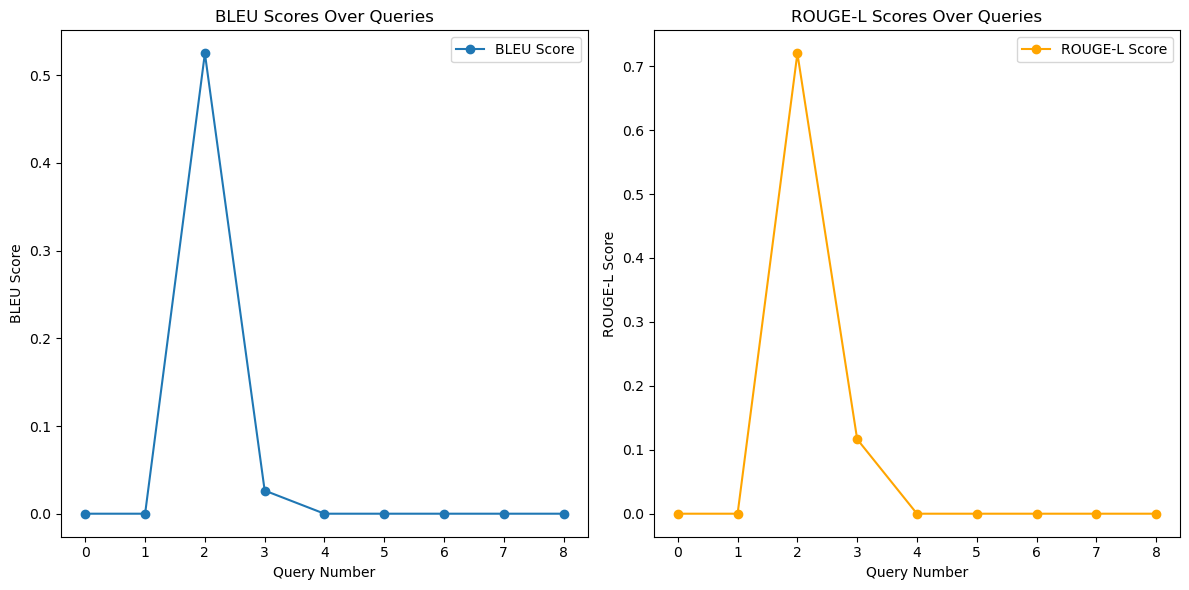

In [9]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
from langchain.llms import CTransformers
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge import Rouge
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Set file path for local use
DATA_PATH = "NLP_FINAL.pdf"
DB_FAISS_PATH = "db_faiss"

# Custom prompt template
custom_prompt_template = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Context: {context}
Question: {question}

Only return the helpful answer below and nothing else.
Helpful answer:
"""

def set_custom_prompt():
    prompt = PromptTemplate(template=custom_prompt_template, input_variables=['context', 'question'])
    return prompt

# Load language model
def load_llm():
    llm = CTransformers(
        model="TheBloke/Llama-2-7B-Chat-GGML",
        model_type="llama",
        max_new_tokens=512,
        temperature=0.3
    )
    return llm

# Update QA Bot to handle single file loading
def qa_bot():
    loader = PyPDFLoader(DATA_PATH)
    documents = loader.load()

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
    texts = text_splitter.split_documents(documents)

    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2", model_kwargs={'device': 'cpu'})
    db = FAISS.from_documents(texts, embeddings)
    db.save_local(DB_FAISS_PATH)  # Save only if creating it initially

    llm = load_llm()
    qa_prompt = set_custom_prompt()
    qa = retrieval_qa_chain(llm, qa_prompt, db)

    return qa

def retrieval_qa_chain(llm, prompt, db):
    qa_chain = RetrievalQA.from_chain_type(
        llm=llm,
        chain_type='stuff',
        retriever=db.as_retriever(search_kwargs={'k': 2}),
        return_source_documents=True,
        chain_type_kwargs={'prompt': prompt}
    )
    return qa_chain

# BLEU and ROUGE evaluation functions
smooth = SmoothingFunction().method4
rouge_instance = Rouge()

def evaluate_response(generated, reference):
    bleu_score = sentence_bleu([reference.split()], generated.split(), smoothing_function=smooth)
    rouge_score = rouge_instance.get_scores(generated, reference, avg=True)
    return bleu_score, rouge_score['rouge-l']['f']

# Initialize a dictionary with reference answers for different questions
reference_answers = {
    "What causes acne?": "Acne is caused by clogged hair follicles and excess oil production.",
    "What are the symptoms of diabetes?": "The symptoms of diabetes include frequent urination, increased thirst, and unexplained weight loss.",
    "What is hypertension?": "Hypertension, or high blood pressure, is a condition where the force of blood against the artery walls is way too much .",
    # Add more question-reference pairs as needed
}

# QA and evaluation pipeline
def final_result(query, qa_instance):
    # Retrieve the corresponding reference answer for each query
    reference_answer = reference_answers.get(query, "No specific reference answer available.")
    
    # Run the query through the QA system
    response = qa_instance.invoke({'query': query})
    generated_answer = response['result']
    
    # Evaluate the response
    bleu_score, rouge_score = evaluate_response(generated_answer, reference_answer)
    return generated_answer, bleu_score, rouge_score

# Initialize QA bot once to avoid reloading
qa_instance = qa_bot()

# Lists to store BLEU and ROUGE scores
bleu_scores = []
rouge_scores = []
queries = []

# Colab user interaction
print("Welcome to Medical Bot! Enter your query below.")
while True:
    user_query = input("Your Question: ")
    if user_query.lower() == "exit":
        print("Goodbye!")
        break

    # Get answer and evaluation metrics
    answer, bleu, rouge = final_result(user_query, qa_instance)

    # Append scores for plotting
    bleu_scores.append(bleu)
    rouge_scores.append(rouge)
    queries.append(user_query)

    # Print results
    print("Answer:", answer)
    print("BLEU Score:", bleu)
    print("ROUGE Score:", rouge)

# Plot the BLEU and ROUGE scores after exit
plt.figure(figsize=(12, 6))

# Plot BLEU Scores
plt.subplot(1, 2, 1)
plt.plot(range(len(bleu_scores)), bleu_scores, label='BLEU Score', marker='o')
plt.xlabel("Query Number")
plt.ylabel("BLEU Score")
plt.title("BLEU Scores Over Queries")
plt.legend()

# Plot ROUGE Scores
plt.subplot(1, 2, 2)
plt.plot(range(len(rouge_scores)), rouge_scores, label='ROUGE-L Score', marker='o', color='orange')
plt.xlabel("Query Number")
plt.ylabel("ROUGE-L Score")
plt.title("ROUGE-L Scores Over Queries")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from langchain.vectorstores import FAISS

# Assuming 'db' is your FAISS index instance
db.save_local("faiss_index")  # This saves the index to "faiss_index" directory


NameError: name 'db' is not defined

In [11]:
!pip install firebase-admin


   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.3/12.6 MB 1.8 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/12.6 MB 1.8 MB/s eta 0:00:07
   ------ --------------------------------- 2.1/12.6 MB 1.9 MB/s eta 0:00:06
   -------- ------------------------------- 2.6/12.6 MB 2.1 MB/s eta 0:00:05
   ---------- ----------------------------- 3.4/12.6 MB 2.3 MB/s eta 0:00:05
   ----------- ---------------------------- 3.7/12.6 MB 2.2 MB/s eta 0:00:05
   ------------- -------------------------- 4.2/12.6 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 4.5/12.6 MB 2.1 MB/s eta 0:00:04
   --------------- ------------------------ 5.0/12.6 MB 2.1 MB/s eta 0:00:04
   -----------------

In [12]:
import firebase_admin
from firebase_admin import credentials, storage

# Replace 'path/to/serviceAccountKey.json' with the path to the downloaded key file
cred = credentials.Certificate(r'C:\Users\Anshul Shinde\Desktop\SEM 5\WEB\chatgptlite-85a65-firebase-adminsdk-6hkl3-cafc7c2b4f.json')
firebase_admin.initialize_app(cred, {
    'storageBucket': 'your-project-id.appspot.com'  # Replace with your Firebase Storage bucket name
})


In [15]:
# Local file path (the file you want to upload)
local_file_path = r'C:\Users\Anshul Shinde\Desktop\SEM 5\NLP\project'

# Firebase Storage path (where you want to store the file in the bucket)
firebase_storage_path = 'NLP/project'


In [16]:
# Get a reference to the Firebase Storage bucket
bucket = storage.bucket()

# Create a new blob (file reference) in Firebase Storage
blob = bucket.blob(firebase_storage_path)

# Upload the file
blob.upload_from_filename(local_file_path)

print("File uploaded to Firebase Storage successfully.")


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Anshul Shinde\\Desktop\\SEM 5\\NLP\\project'